## 3. Exploring data tables with Pandas

1. Use Pandas to read the house prices data. How many columns and rows are there in this dataset?
2. The first step I usually do is to use commands like pandas.head() to print a few rows of data. Look around what kind of features are available and read data description.txt for more info. Try to understand as much as you can. Pick three features you think will be good predictors of house prices and explain what they are.
3. How many unique conditions are there in SaleCondition? Use Pandas to find out how many samples are labeled with each condition. What do you learn from doing this?
4. Select one variable you picked in b., do you want to know something more about that variable? Use Pandas to answer your own question and de- scribe what you did shortly here.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl

houseData= pd.read_csv("train.csv")
houseData.shape  #1.rows = 1460, columns = 81.

(1460, 81)

In [2]:
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 3.2 Three features with reasons.
MSZoning: Identifies the general zoning classification of the sale. #environment.

MSSubClass: Identifies the type of dwelling involved in the sale.

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
คิดว่าทั้ง 3 features ที่เลือกมีผลต่อราคาบ้านอย่างมาก 
1.MSZoning โซนที่ตั้งของบ้าน ยกตัวอย่างเช่น ถ้าโซนกลางเมือง โซนอุตสาหกรรม ราคาจะค่อนข้างสูง ถ้าเป็นชุมชนแออัดราคาจะถูกลงมาหน่อย feature นี้เห็นความแตกต่างชัดเจน
2.MSSubClass ชนิดของบ้านก็เห็นความแตกต่างชัดเจน บ้านแต่ละแบบราคาจะต่างกัน
3.YearRemodAdd สาเหตุที่เลือกเพราะว่าปีที่ตกแต่งเพิ่ม ถ้าไม่ห่างจากปีปัจจุบันมาก ราคาจะสูง ยิ่งไม่ห่างมากยิ่งใหม่ ยิ่งใหม่ยิ่งแพง คิดว่า feature นี้ชัดเจนจึงเลือกมา

In [3]:
houseData["SaleCondition"].unique() #3.There are 6 samples in the SaleCondition. ได้รู้ว่า feature 'SaleCondition' มีค่าอะไรบ้าง

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

# 3.4 I picked "YearRemodAdd" feature.

C:\Users\thipawan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


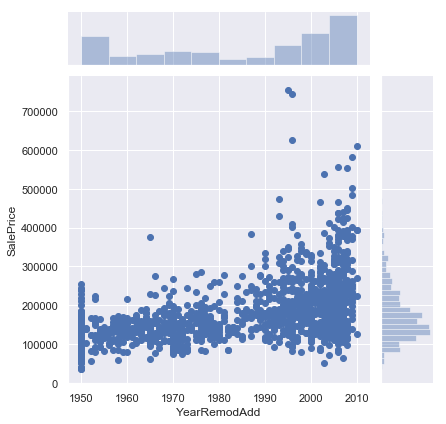

In [4]:
houseData["YearRemodAdd"].isna().sum() #เพื่อดูว่ามี Nan Value ไหม

sns.jointplot(houseData["YearRemodAdd"], houseData["SalePrice"])#ดูความสัมพันธ์ระหว่าง ปีที่ปรับปรุงกับราคาบ้าน เพื่อพิสูจน์สมมติฐานจากข้อ 2. 
#จากการพล็อตกราฟจะห็นว่าจำนวน พศ. สัมพันธ์กับราคาบ้าน ที่พศ.ต้นๆราคาบ้านมีแนวโน้มน้อย แต่เมื่อพศ.หลังๆ จะเห็นว่าราคาแนวโน้มสูงจาก พศ ก่อนหน้า

## 4. Learning to explore data with Seaborn

1. Let us first look at the variable we want to predict SalePrice. Use Seaborn to plot histogram of sale prices. What do you notice in the histogram?
2. Plot the histogram of the LotArea variable. What do you notice in the histogram?
3. Use Seaborn to plot LotArea in the x-axis and SalePrice on the y-axis. Try plotting log(LotArea) versus log(SalePrice) and see if the plot looks better.

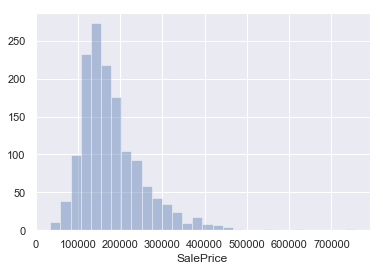

In [5]:
sns.distplot(houseData["SalePrice"],kde=False, bins = 30) #กราฟเบ้ไปทางซ้าย ข้อมูลมีการกระจายตัวไม่สม่ำเสมอ


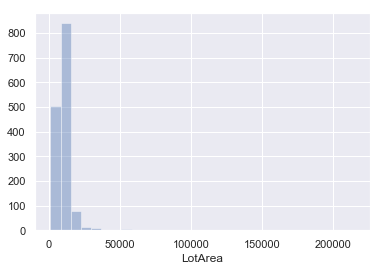

In [6]:
sns.distplot(houseData["LotArea"],kde=False, bins= 30) #กราฟเบ้ไปทางซ้ายเหมือนกัน ข้อมูลมีการกระจายตัวไม่สม่ำเสมอ

C:\Users\thipawan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


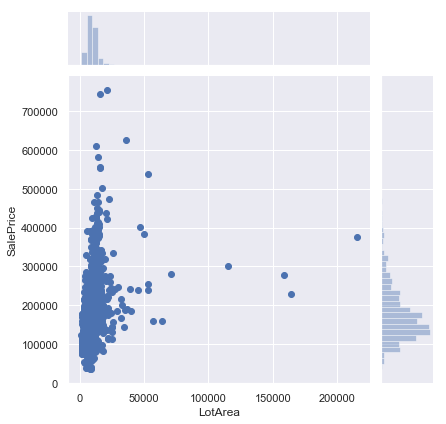

In [7]:
sns.jointplot(houseData["LotArea"], houseData["SalePrice"])

C:\Users\thipawan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


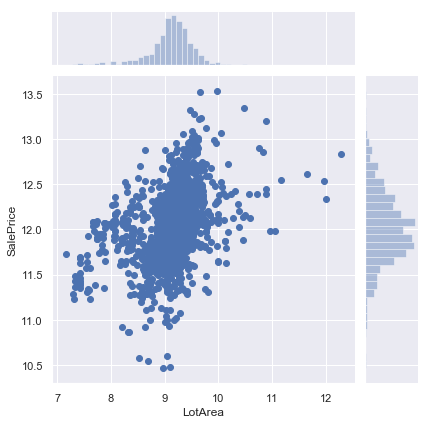

In [8]:
sns.jointplot(np.log(houseData["LotArea"]), np.log(houseData["SalePrice"])) #มีการกระจายตัวเท่ากัน ทำให้ predict ถูกต้อง

## 5. Dealing with missing values

1. Suppose we want to start the first step of house price modeling by exploring the relationship between four variables: MSSubClass, LotArea, LotFrontage and SalePrice. I have done some exploring and found out that LotFrontage has a lot of missing values, so you need to fix it.
2. LotFrontage is the width of the front side of the property. Use Pandas to find out how many of the houses in our database is missing LotFrontage value.
3. Use Pandas to replace NaN values with another number. Since we are just exploring and not modeling yet, you can simply replace NaN with zeros for now.

In [9]:
houseData["LotFrontage"].isna().sum()  # 2. there are 259 missing values, as 17.74 % of the entire values in the LotFrontage.

259

In [10]:
houseData["LotFrontage"] #show data in the LotFrontage with missing values to replace NaN with zeros.

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7         NaN
8        51.0
9        50.0
10       70.0
11       85.0
12        NaN
13       91.0
14        NaN
15       51.0
16        NaN
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24        NaN
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
        ...  
1430     60.0
1431      NaN
1432     60.0
1433     93.0
1434     80.0
1435     80.0
1436     60.0
1437     96.0
1438     90.0
1439     80.0
1440     79.0
1441      NaN
1442     85.0
1443      NaN
1444     63.0
1445     70.0
1446      NaN
1447     80.0
1448     70.0
1449     21.0
1450     60.0
1451     78.0
1452     35.0
1453     90.0
1454     62.0
1455     62.0
1456     85.0
1457     66.0
1458     68.0
1459     75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [11]:
houseData["LotFrontage"] = houseData["LotFrontage"].fillna(0) #3. replace NaN with zeros.
houseData["LotFrontage"]

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7         0.0
8        51.0
9        50.0
10       70.0
11       85.0
12        0.0
13       91.0
14        0.0
15       51.0
16        0.0
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24        0.0
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
        ...  
1430     60.0
1431      0.0
1432     60.0
1433     93.0
1434     80.0
1435     80.0
1436     60.0
1437     96.0
1438     90.0
1439     80.0
1440     79.0
1441      0.0
1442     85.0
1443      0.0
1444     63.0
1445     70.0
1446      0.0
1447     80.0
1448     70.0
1449     21.0
1450     60.0
1451     78.0
1452     35.0
1453     90.0
1454     62.0
1455     62.0
1456     85.0
1457     66.0
1458     68.0
1459     75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [12]:
houseData['MasVnrArea'] = houseData['MasVnrArea'].fillna(0) #เติม 0 แทน่ Nan เพราะว่า 2 features นี้เหมาะกับใส่ 0 ถ้าใส่อย่างอื่นจะทำให้ค่าคลาดเคลื่อนได้
houseData['GarageYrBlt'] = houseData['GarageYrBlt'].fillna(0) # จำนวนปีถ้าไม่มีข้อมูลก็ให้ =0 ไม่จำเป็นต้องสร้างค่าอื่นมา เพราะจะทำให้ค่าpredict ที่ได้คลาดเคลื่อนได้

## 6. Correlations between multiple variables

One incredible feature of Seaborn is the ability to create correlation grid with pairplot function. We want to create one single plot that show us how all variables are correlated.
1. First, you need to create a data table with four columns: MSSubClass, LotArea (with log function applied), LotFrontage (missing values replaced) and SalePrice (with log function applied).
2. Then, use pairplot to create a grid of correlation plots. What do you observe from this plot?

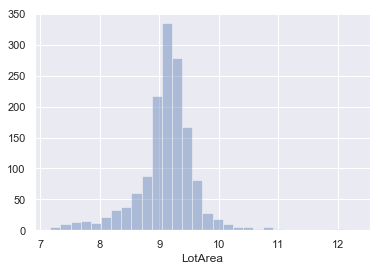

In [13]:
houseData["LotArea"]= np.log(houseData["LotArea"]) # Distribution SalePrice with log.
sns.distplot(houseData["LotArea"],kde=False, bins= 30) #show SalePrice was distributed.

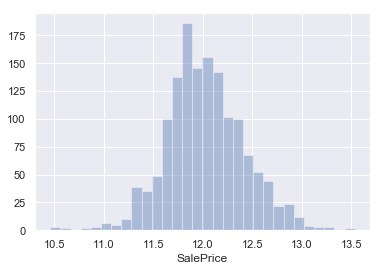

In [14]:
houseData["SalePrice"] = np.log(houseData["SalePrice"]) # Distribution SalePrice with log.
sns.distplot(houseData["SalePrice"],kde=False, bins= 30) #show SalePrice was distributed.

In [15]:
data = {'MSSubClass' : houseData["MSSubClass"], 'LotArea' : houseData["LotArea"],'LotFrontage': houseData["LotFrontage"],'SalePrice' : houseData["SalePrice"]}
newTable_4 = pd.DataFrame(data)
newTable_4 # ทำให้ทั้ง 4 features อยู่ใน data เดียวกันแล้วจึงนำมาพล็อต

,MSSubClass,LotArea,LotFrontage,SalePrice
0,60,9.041922,65.0,12.247694
1,20,9.169518,80.0,12.109011
2,60,9.328123,68.0,12.317167
3,70,9.164296,60.0,11.849398
4,60,9.565214,84.0,12.429216
5,50,9.554993,85.0,11.870600
6,20,9.218705,75.0,12.634603
7,60,9.247829,0.0,12.206073
8,50,8.719317,51.0,11.774520
9,190,8.911934,50.0,11.678440


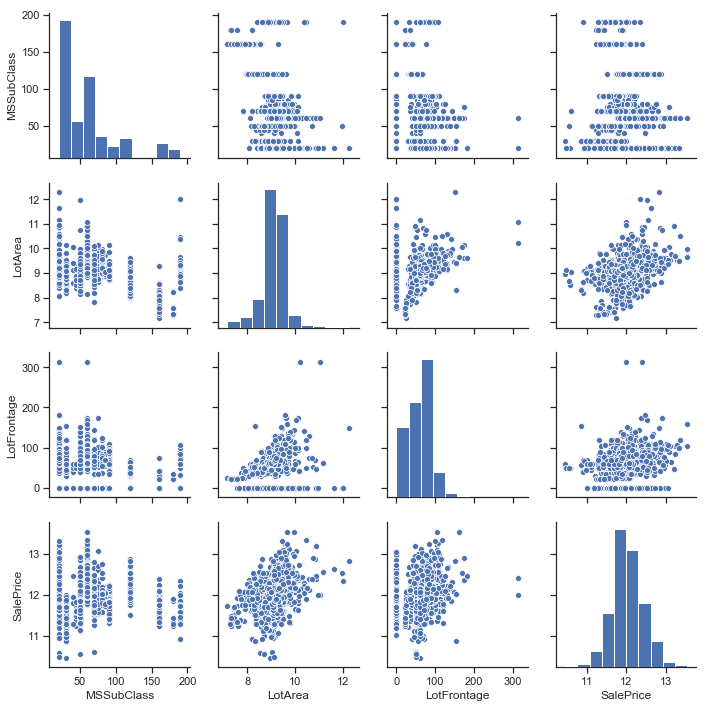

In [16]:
sns.set(style="ticks",color_codes=True)
sns.pairplot(newTable_4)

#6.2จากที่พล็อตกราฟจะเห็นว่ากราฟที่เป็นความสัมพันธ์ระหว่าง LotArea, LotFrontage, SalePrice มีแนวโน้มไปในทิศทางเดียวกัน ส่วนกราฟที่แสดงความสัมพํนธ์กับ MSSubClass ดูไม่ออกว่าแนวโน้มเป็นอย่างไร ไม่มีความสัมพันธ์กับfeaturesอื่นๆ เมื่อกลับไปดูรายละเอียด feature พบว่าเป็น categorical feature ที่อยู่ในรูป numeric ทำให้ไม่เห็นความสัมพันธ์กับ features อื่นๆ

## 7. Data Preparation

Let's prepare train.csv for model training

1. Pick columns that are numeric data and plot distributions of those data (with Seaborn). If you find a column with skewed distribution you will write a script to transform that column with a log function. Then standardize them.
2. For categorical variables, we will simply transform categorical data into numeric data by using function `pandas.get dummies()`.
3. Split data into x and y. The variable x contains all the house features except the SalePrice. y contains only the SalePrice.

In [17]:
columns_numeric = houseData._get_numeric_data() 
columns_numeric #Those columns are numeric data .

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,9.041922,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,12.247694
1,2,20,80.0,9.169518,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,12.109011
2,3,60,68.0,9.328123,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,12.317167
3,4,70,60.0,9.164296,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,11.849398
4,5,60,84.0,9.565214,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,12.429216
5,6,50,85.0,9.554993,5,5,1993,1995,0.0,732,...,40,30,0,320,0,0,700,10,2009,11.870600
6,7,20,75.0,9.218705,8,5,2004,2005,186.0,1369,...,255,57,0,0,0,0,0,8,2007,12.634603
7,8,60,0.0,9.247829,7,6,1973,1973,240.0,859,...,235,204,228,0,0,0,350,11,2009,12.206073
8,9,50,51.0,8.719317,7,5,1931,1950,0.0,0,...,90,0,205,0,0,0,0,4,2008,11.774520
9,10,190,50.0,8.911934,5,6,1939,1950,0.0,851,...,0,4,0,0,0,0,0,1,2008,11.678440


In [18]:
columns_num =  columns_numeric.select_dtypes(include=[np.number]).columns.tolist()
columns_num   #show the columns that are numerical.

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [19]:
columns_numeric = columns_numeric.drop(columns ='MSSubClass')
columns_numeric = columns_numeric.drop(columns ='OverallQual')
columns_numeric = columns_numeric.drop(columns ='OverallCond') #drop those columns because It was categorical.

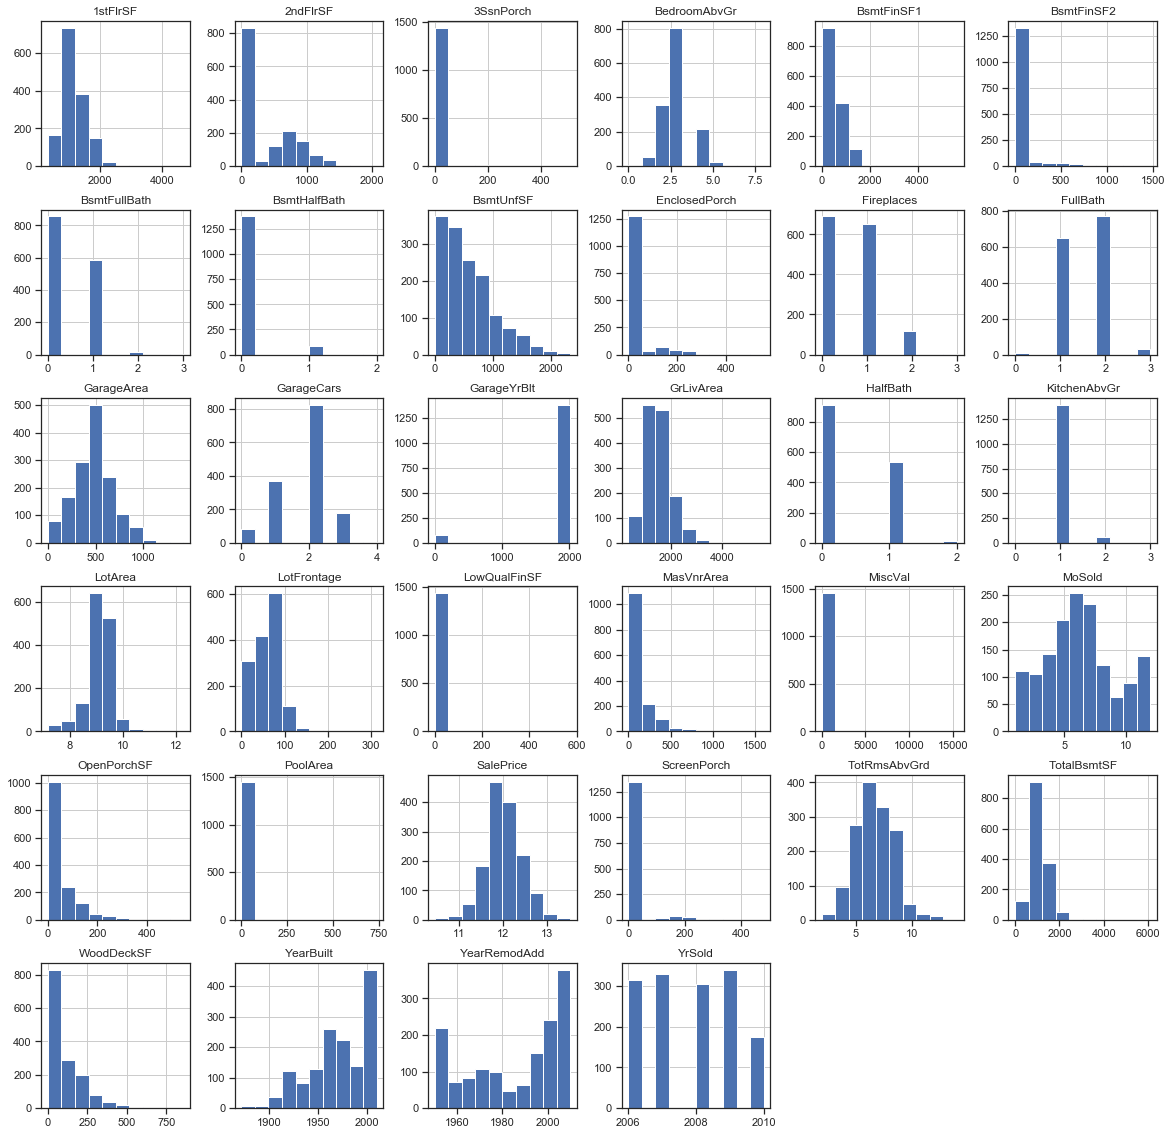

In [20]:
columns_numeric = columns_numeric.drop(columns = "Id") 
#drop Id, because it's just counter.

columns_numeric.hist(figsize=(20,20))
plt.show() #before normalization or scaler

In [21]:
#from graph above จะเห็นว่ามีบาง features ที่มีข้อมูลเป็น 0 จำนวนมาก ดังนั้นจึง drop ออก


columns_numeric = columns_numeric.drop(columns = "3SsnPorch") 
columns_numeric = columns_numeric.drop(columns = "MiscVal") 
columns_numeric = columns_numeric.drop(columns = "LowQualFinSF") 
columns_numeric = columns_numeric.drop(columns = "PoolArea") 
columns_numeric = columns_numeric.drop(columns = "ScreenPorch") 
columns_numeric = columns_numeric.drop(columns = "BsmtFinSF2") 
columns_numeric = columns_numeric.drop(columns = "BsmtHalfBath")
columns_numeric = columns_numeric.drop(columns = "EnclosedPorch")

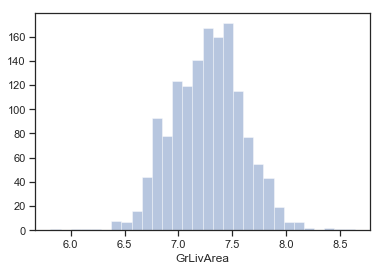

In [22]:
columns_numeric["GrLivArea"]= np.log(columns_numeric["GrLivArea"]) # Distribution GrLivArea with log.
sns.distplot(columns_numeric["GrLivArea"],kde=False, bins= 30) #show GrLivArea was distributed.

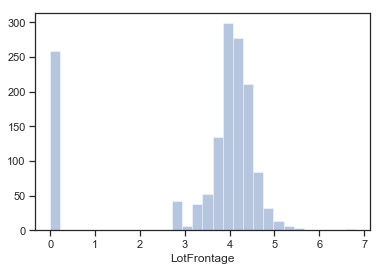

In [23]:
#เนื่องจากบาง features มีค่า 0 อยู่ด้วยไม่สามารถใช้ log ในการทำ Distribution ได้ดังนั้นจึงใช้ cuberoot แทน

columns_numeric["LotFrontage"]= np.cbrt(columns_numeric["LotFrontage"]) # Distribution LotFrontage with cuberoot.
sns.distplot(columns_numeric["LotFrontage"],kde=False, bins= 30) #show LotFrontage was distributed.

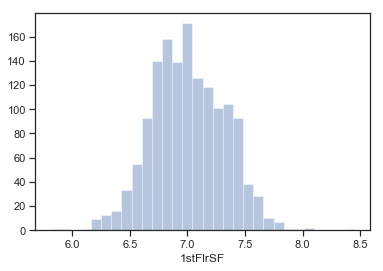

In [24]:
columns_numeric["1stFlrSF"]= np.log(houseData["1stFlrSF"]) # Distribution S1stFlrSF with log.
sns.distplot(columns_numeric["1stFlrSF"],kde=False, bins= 30) #show 1stFlrSF was distributed.

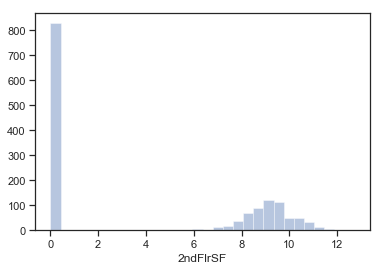

In [25]:
columns_numeric["2ndFlrSF"]= np.cbrt(columns_numeric["2ndFlrSF"]) # Distribution 2ndFlrSF with cuberoot.
sns.distplot(columns_numeric["2ndFlrSF"],kde=False, bins= 30) #show 2ndFlrSF was distributed.

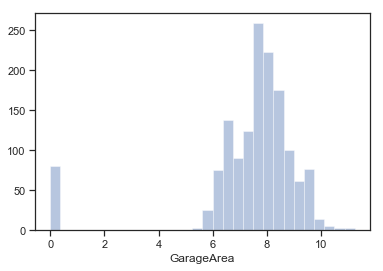

In [26]:
columns_numeric["GarageArea"]= np.cbrt(columns_numeric["GarageArea"]) # Distribution GarageArea with cuberoot.
columns_numeric["MasVnrArea"]= np.cbrt(columns_numeric["MasVnrArea"]) # Distribution MasVnrArea with cuberoot.
sns.distplot(columns_numeric["GarageArea"],kde=False, bins= 30) #show GarageArea was distributed.

In [27]:
columns_numeric["BsmtFinSF1"]= np.cbrt(columns_numeric["OpenPorchSF"]) # Distribution OpenPorchSF with cuberoot.
columns_numeric["BsmtUnfSF"]= np.cbrt(columns_numeric["BsmtUnfSF"]) # Distribution BsmtUnfSF with cuberoot.
columns_numeric["TotalBsmtSF"]= np.cbrt(columns_numeric["TotalBsmtSF"]) # Distribution TotalBsmtSF with cuberoot.
columns_numeric["OpenPorchSF"]= np.cbrt(columns_numeric["OpenPorchSF"]) # Distribution OpenPorchSF with cuberoot.
columns_numeric["WoodDeckSF"]= np.cbrt(columns_numeric["WoodDeckSF"]) # Distribution WoodDeckSF with cuberoot.  

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_numeric[["YrSold","GarageYrBlt" ,"YearRemodAdd" ,"YearBuilt"]] = scaler.fit_transform(columns_numeric[["YrSold","GarageYrBlt" ,"YearRemodAdd" ,"YearBuilt"]]) #"YrSold","GarageYrBlt" ,"YearRemodAdd" ,"YearBuilt"
#สาเหตุที่ใช้ MinMaxScaler() กับจำนวนปีทั้งหมด เพราะว่าจาก data ใน features อื่นๆค่าจะน้อยไม่เกิน 100 แต่ปีเป็นพัน ดังนั้นจึงต้องมีการปรับสเกล 

C:\Users\thipawan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


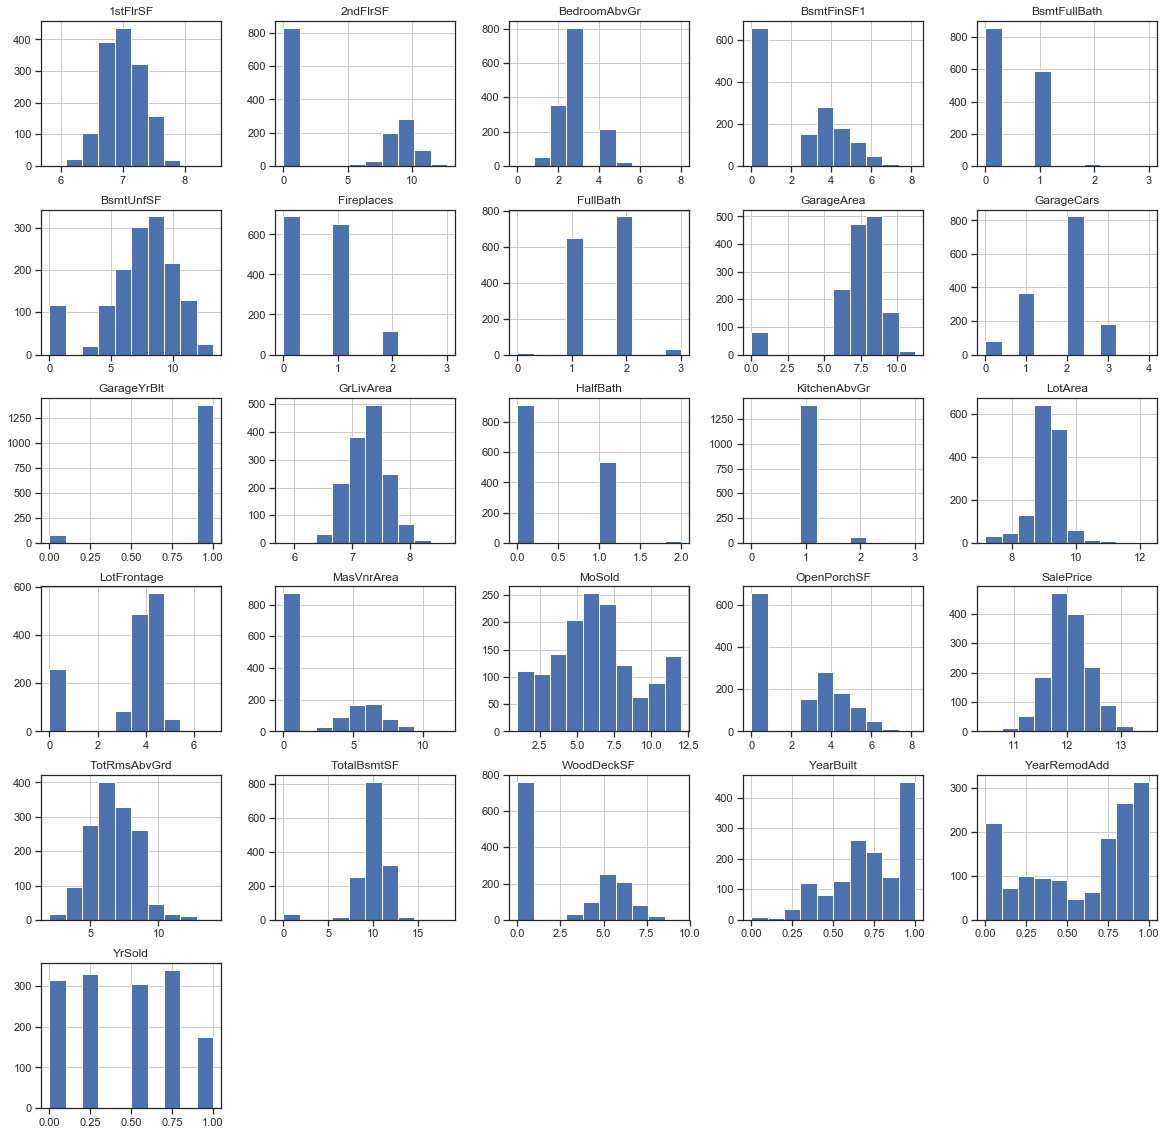

In [29]:
columns_numeric.hist(figsize=(20,20))
plt.show() #After normalization or scaler

In [30]:
colNew_object = houseData.select_dtypes(include=[np.object]).columns.tolist()
colNew_object  #show the columns that are categorical.

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [31]:
houseData[colNew_object].isna().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [32]:
drop_cate = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu']
fill_Na = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond']
houseData = houseData.drop(columns = drop_cate)

In [33]:
columns_object = houseData.select_dtypes(include=[np.object]).columns.tolist()
columns_object  #show the columns that are categorical.

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [34]:
columns_categorical =  pd.get_dummies(houseData[columns_object])
columns_categorical #Those columns are categorical data 

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
5,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
8,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
9,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [35]:
# นำ categorical ที่เป็น number แยกออกมาสร้างเป็น dataframes แยกไว้ 
data = {'MSSubClass' : houseData["MSSubClass"], 'OverallQual' : houseData["OverallQual"],'OverallCond': houseData["OverallCond"]}
categorical_num = pd.DataFrame(data)

catNum = categorical_num.select_dtypes(include=[np.number]).columns.tolist() #List of columns in the categorical_num.

# แล้วเปลี่ยนประเภทจากตัวเลขเป็น string เพราะจริงๆแล้ว features เหล่านี้เป็น Categorical เพื่อสามารถแยกแบบ categorical ได้ต่อไป
categorical_num = categorical_num[catNum].astype(str)

In [36]:
New_categorical =  pd.get_dummies(categorical_num[catNum]) 

In [37]:
## นำ features ทั้งที่เป็น numerical และ categorical รวมกัน
mergeNumCate = pd.concat([columns_numeric, columns_categorical, New_categorical], axis=1) 
mergeNumCate 

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,OverallQual_9,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9
0,4.020726,9.041922,0.949275,0.883333,5.808786,3.936497,5.313293,9.494919,6.752270,9.487518,...,0,0,0,0,0,1,0,0,0,0
1,4.308869,9.169518,0.753623,0.433333,0.000000,0.000000,6.573138,10.806535,7.140453,0.000000,...,0,0,0,0,0,0,0,0,1,0
2,4.081655,9.328123,0.934783,0.866667,5.451362,3.476027,7.571174,9.725888,6.824374,9.531750,...,0,0,0,0,0,1,0,0,0,0
3,3.914868,9.164296,0.311594,0.333333,0.000000,3.271066,8.143253,9.109767,6.867974,9.109767,...,0,0,0,0,0,1,0,0,0,0
4,4.379519,9.565214,0.927536,0.833333,7.047299,4.379519,7.883735,10.461690,7.043160,10.173634,...,0,0,0,0,0,1,0,0,0,0
5,4.396830,9.554993,0.876812,0.750000,0.000000,3.107233,4.000000,9.267680,6.679599,8.271904,...,0,0,0,0,0,1,0,0,0,0
6,4.217163,9.218705,0.956522,0.916667,5.708267,3.848501,6.818462,11.901979,7.434848,0.000000,...,0,0,0,0,0,1,0,0,0,0
7,0.000000,9.247829,0.731884,0.383333,6.214465,5.886765,6.000000,10.344652,7.009409,9.943009,...,0,0,0,0,0,0,1,0,0,0
8,3.708430,8.719317,0.427536,0.000000,0.000000,0.000000,9.837369,9.837369,6.929517,9.093672,...,0,0,0,0,0,1,0,0,0,0
9,3.684031,8.911934,0.485507,0.000000,0.000000,1.587401,5.192494,9.969910,6.981935,0.000000,...,0,0,0,0,0,0,1,0,0,0


In [38]:
x = mergeNumCate.drop(columns = "SalePrice")
data = {'SalePrice' : columns_numeric["SalePrice"]}
y = pd.DataFrame(data)

# Select the best feature from all of the features(314 features)

In [39]:
from sklearn.feature_selection import SelectKBest, chi2,f_regression
X_new = SelectKBest(f_regression, k=200).fit_transform(x,y)
x= X_new

C:\Users\thipawan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 8. Let us first fit a very simple linear regression model, just to see what we get.

1. Use import LinearRegression from sklearn.linear model and use function `fit()` to fit the model.
2. Use function `predict()` to get house price predictions from the model (let’s call the predicted house prices yhat).
3. Plot `y` against `yhat` to see how good your predictions are.

In [40]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x,y)
reg.score(x,y)

0.9315827570219142

In [41]:
yhat = reg.predict(x)

C:\Users\thipawan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


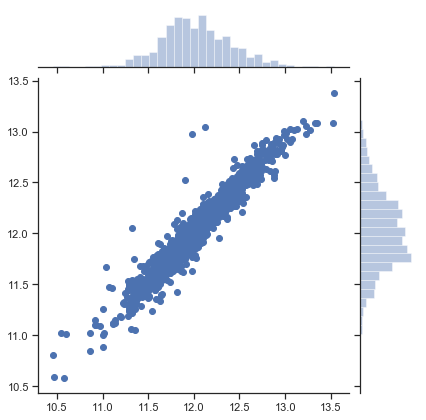

In [42]:
sns.jointplot(y,yhat) #พบว่า y and yhat ค่าจริงๆกับค่าที่ predict ออกมา ไปในทิศทางเดียวกัน

## 9. Assessing Your Model

According to Kaggle’s official rule on this problem, they use root mean square errors (rmse) to judge the accuracy of our model. This error computes the dif- ference between the log of actual house prices and the log of predicted house price. Find the mean and squareroot them.

We want to see how we compare to other machine learning contestants on Kag- gle so let us compute our rmse. Luckily, sklearn has done most of the work for you by providing mean square error function. You can use it by importing the function from sklearn.metrics. Then, you can compute mean square error and take a squareroot to get rmse.

What’s the rmse of your current model? Check out Kaggle Leaderboard for this problem to see how your number measures up with the other contestants.

In [43]:
from sklearn import metrics

np.sqrt(metrics.mean_squared_error(y,yhat)) #The rmse of my current model is 0.10444

0.10444759861854906

## 10. Cross Validation

As we discussed earlier, don’t brag about your model’s accuracy until you have performed cross validation. Let us check cross-validated performance to avoid embarrassment.

Luckily, scikit learn has done most of the work for us once again. You can use the function `cross_val_predict()` to train the model with cross validation method and output the predictions.

What’s the rmse of your cross-validated model? Discuss what you observe in your results here. You may try plotting this new yhat with y to get better insights about this question.

In [44]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
linear = LinearRegression()
new_yhat = cross_val_predict(linear,x,y,cv=3)

C:\Users\thipawan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


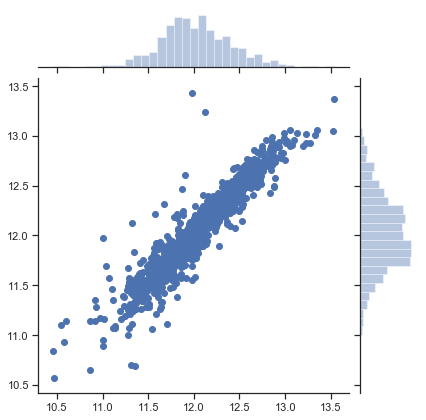

In [45]:
sns.jointplot(y,new_yhat) #พบว่า y and yhat ค่าจริงๆกับค่าที่ predict ออกมา ไปในทิศทางเดียวกัน

In [46]:
new_yhat_df = pd.DataFrame({'SalesPrice_pred':new_yhat[:,0]})
# new_yhat_df.shape
# type(new_yhat)
new = pd.concat([new_yhat_df, y], axis=1) 
new
# plt.hist(new_yhat)


,SalesPrice_pred,SalePrice
0,12.210299,12.247694
1,12.219846,12.109011
2,12.253963,12.317167
3,12.125219,11.849398
4,12.666322,12.429216
5,11.998147,11.870600
6,12.502249,12.634603
7,12.225506,12.206073
8,11.478920,11.774520
9,12.319212,11.678440


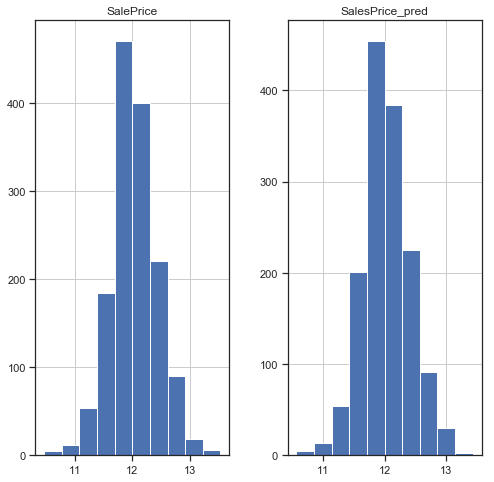

In [47]:
# sns.jointplot(y,new_yhat_df) #
new.hist(figsize=(8,8))
# plt.xlim(0,20)
# plt.ylim(0,1600)
plt.show()


## 11 (Optional) Fit Better Models
There are other models you can fit that will perform better than linear regres- sion. For example, you can fit linear regression with L2 regularization. This class of models has a street name of ‘Ridge Regression’ and sklearn simply called them Ridge. As we learned last time, this model will fight overfitting problem. Furthermore, you can try linear regression with L1 regularization (street name Lasso Regression or Lasso in sklearn). Try these models and see how you com- pare with other Kagglers now. You can write about your findings below.